In [2]:
import pandas as pd

In [3]:
titanic_df = pd.read_csv("titanic-data.csv")

## BarGraph ##

<Axes: title={'center': 'Count of survived passenger'}, xlabel='Survived (0=No, 1=yes)', ylabel='No of passenger'>

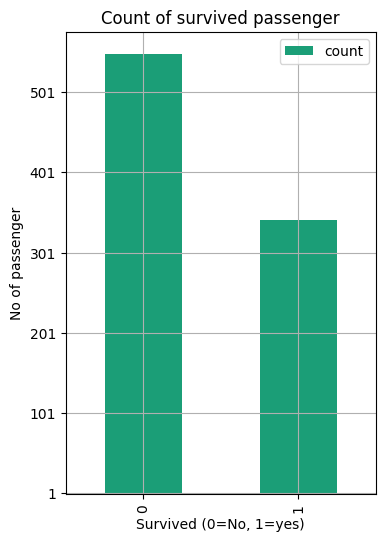

In [21]:
titanic_df['Survived'].value_counts().plot(kind= 'bar'
                                           ,title='Count of survived passenger',
                                          figsize= (4,6),
                                          legend=True,
                                          yticks= list(range(1,600,100)),
                                          xlabel= "Survived (0=No, 1=yes)",
                                           ylabel= "No of passenger",
                                           grid= True,
                                           colormap= "Dark2"
                                          )

In [5]:
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [25]:
group_by_gender=titanic_df[["Sex", "Survived"]].groupby(by= "Sex")

<Axes: xlabel='Sex,Survived'>

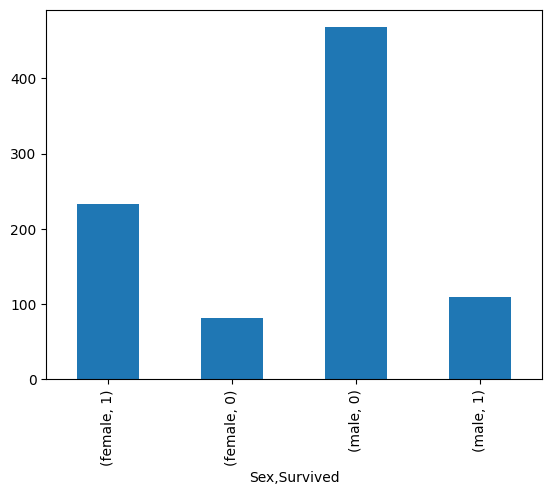

In [26]:
group_by_gender['Survived'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Count of survived passenger'}, xlabel='Survived (0=No, 1=yes)', ylabel='No of passenger'>

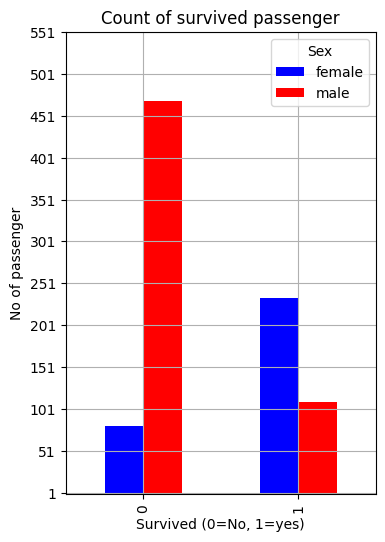

In [46]:
pd.crosstab(titanic_df.Survived, titanic_df.Sex).plot(kind= "bar",
                                        title='Count of survived passenger',
                                          figsize= (4,6),
                                          legend=True,
                                          yticks= list(range(1,600,50)),
                                          xlabel= "Survived (0=No, 1=yes)",
                                           ylabel= "No of passenger",
                                           grid= True,
                                           colormap= "bwr"
                                                     )

<Axes: title={'center': 'Count of survived passenger'}, xlabel='Survived (0=No, 1=yes)', ylabel='No of passenger'>

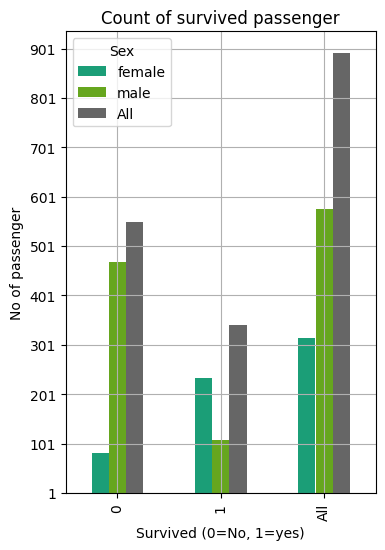

In [11]:
pd.crosstab(titanic_df.Survived, titanic_df.Sex, margins= True).plot(kind= "bar",
                                        title='Count of survived passenger',figsize= (4,6),legend=True,
                                          yticks= list(range(1,1000,100)),xlabel= "Survived (0=No, 1=yes)",
                                           ylabel= "No of passenger",grid= True,
                                           colormap= "Dark2"
                                                     )

In [51]:
group_by_embarked=titanic_df[["Embarked", "Age"]].groupby(by= "Embarked")

<Axes: xlabel='Embarked'>

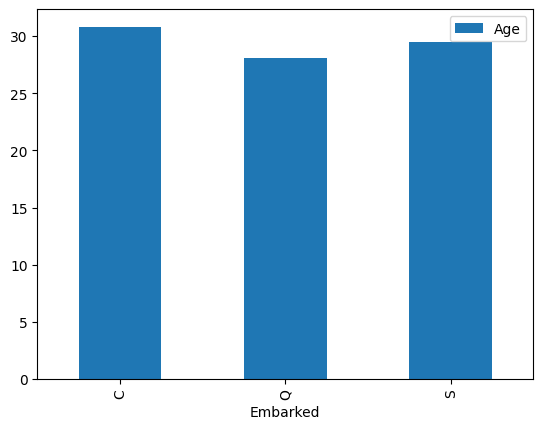

In [55]:
group_by_embarked.mean().plot(kind= "bar")

array([<Axes: ylabel='Age'>], dtype=object)

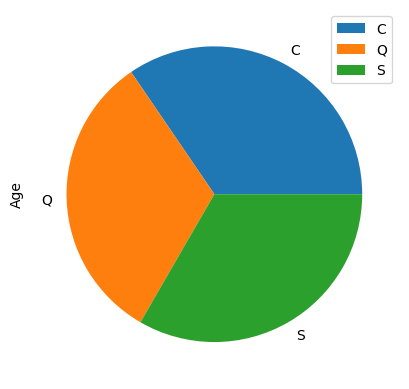

In [60]:
group_by_embarked = titanic_df[["Embarked", "Age"]].groupby(by='Embarked')
group_by_embarked.median().plot(
    kind="pie", subplots= True
)

<Axes: ylabel='Age'>

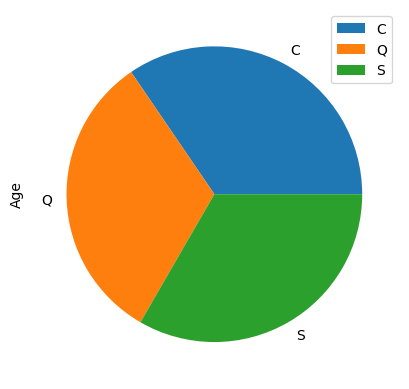

In [4]:
group_by_embarked = titanic_df[["Embarked", "Age"]].groupby(by='Embarked')
group_by_embarked.median().plot(
    kind="pie", y= 'Age'
)

In [5]:
group_by_embarked.median()

,Age
Embarked,
C,29.0
Q,27.0
S,28.0


array([<Axes: ylabel='female'>, <Axes: ylabel='male'>], dtype=object)

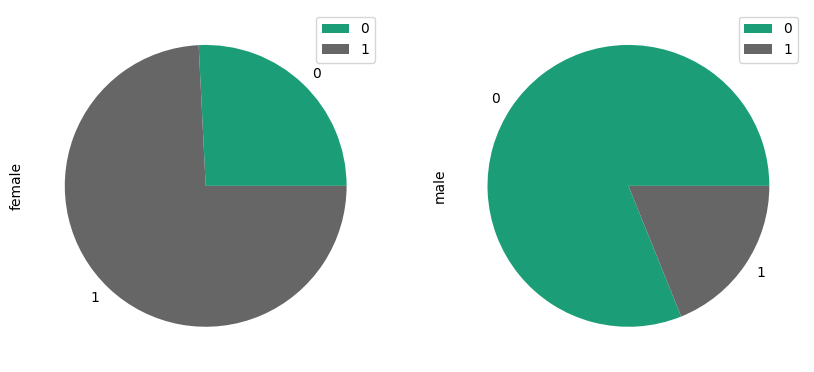

In [17]:
pd.crosstab(titanic_df.Survived, titanic_df.Sex).plot(kind= "pie",
                                        subplots= True,
                                        #title='Count of survived passenger',
                                        figsize= (10,10),
                                        legend=True,
                                            
                                           colormap= "Dark2"
                                                     )

## line graph ##

<Axes: >

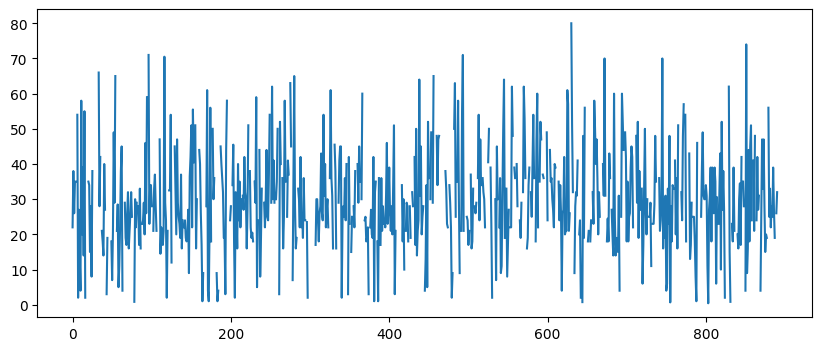

In [18]:
titanic_df['Age'].plot.line(figsize=(10,4))

<Axes: >

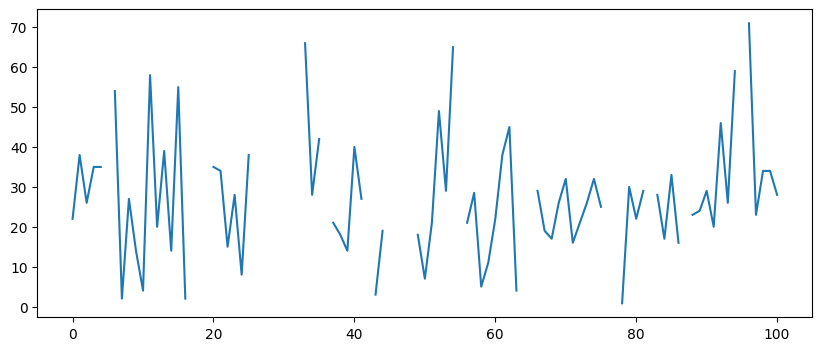

In [19]:
titanic_df['Age'].loc[:100].plot.line(figsize=(10,4))

<Axes: >

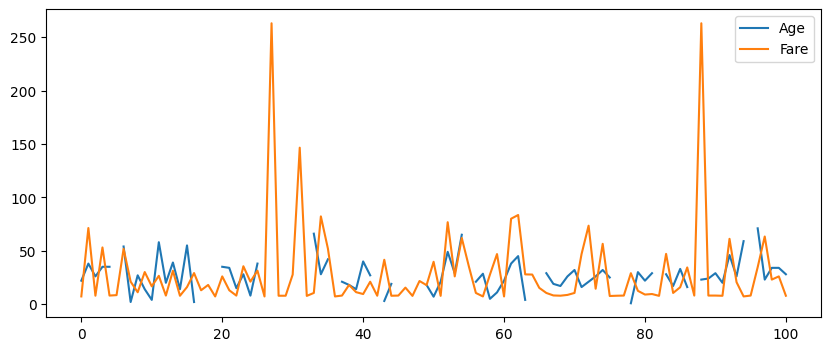

In [20]:
titanic_df.loc[:100, ['Age', 'Fare']].plot.line(figsize=(10,4))

## overall survival rate ##

<Axes: xlabel='Survived'>

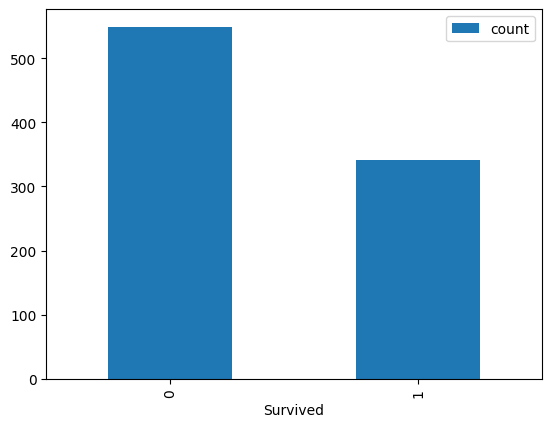

In [32]:
#overall survival rate
titanic_df.value_counts('Survived').plot(kind='bar', legend= True)

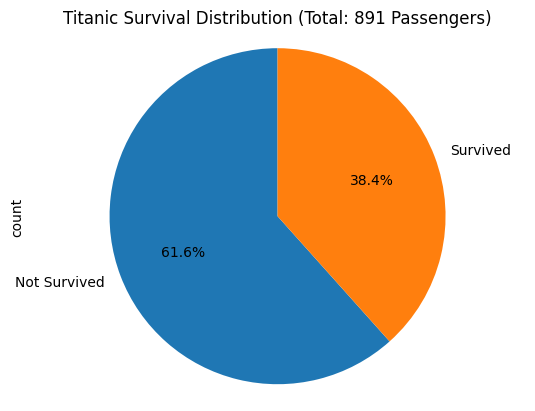

In [34]:
import matplotlib.pyplot as plt

# Count of survivors and non-survivors
survival_counts = titanic_df['Survived'].value_counts()

# Plot pie chart
survival_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Not Survived', 'Survived'])

# Add title with total number of passengers
total_passengers = len(titanic_df)
plt.title(f'Titanic Survival Distribution (Total: {total_passengers} Passengers)')

# Equal aspect ratio ensures pie is a circle
plt.axis('equal')

# Show the plot
plt.show()


## survival vary by gender? ##

<Axes: xlabel='Sex'>

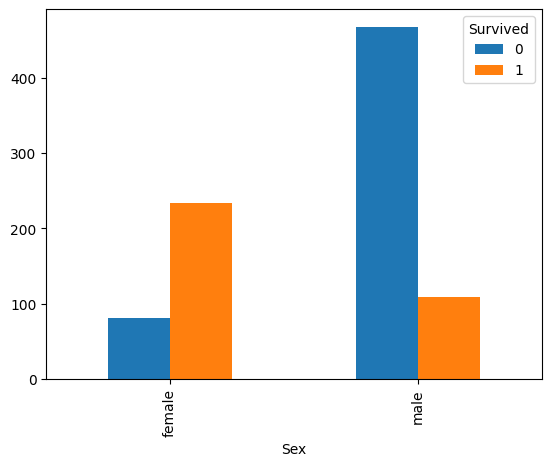

In [35]:
pd.crosstab(titanic_df.Sex, titanic_df.Survived).plot(kind='bar')

## the survival rate by passenger class (Pclass)? ##

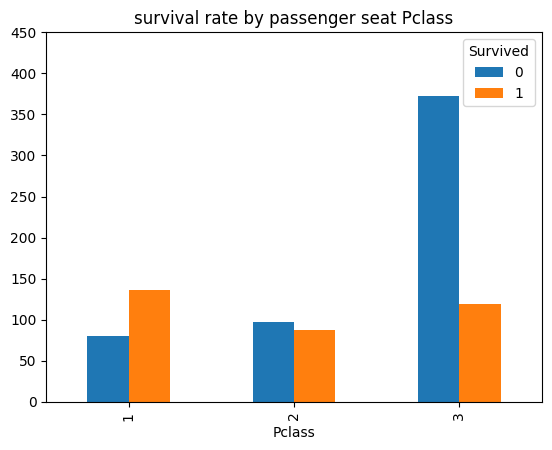

In [49]:
group_pclass= titanic_df.groupby(['Pclass','Survived']).size().unstack().plot(kind="bar",
                                                    title= "survival rate by passenger seat Pclass",                      
                                                     yticks= list(range(0,500,50)))

## stacked bar chart showing survival by Pclass and Sex. ##

<Axes: xlabel='Pclass'>

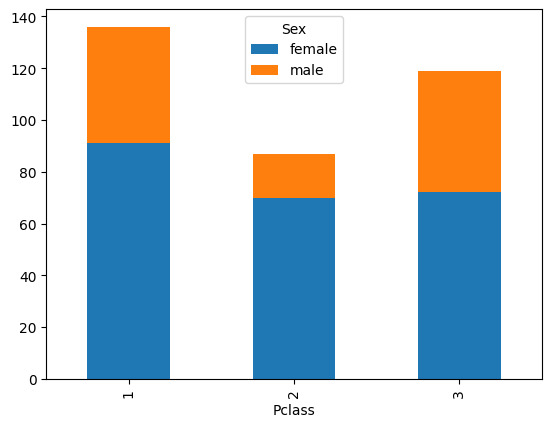

In [52]:
pd.crosstab(index=titanic_df['Pclass'], columns=titanic_df['Sex'], 
            values=titanic_df['Survived'], aggfunc='sum').plot(kind='bar', stacked= True)

## age distribution of passengers? ##

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

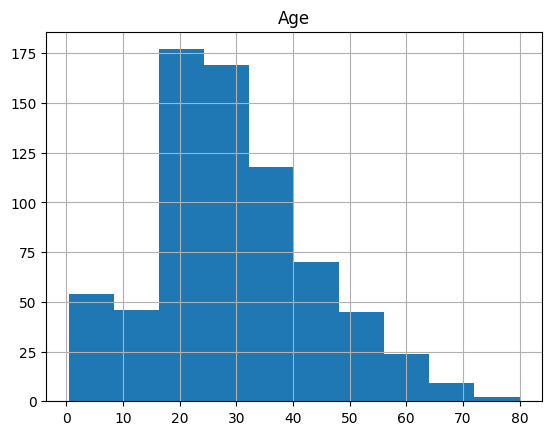

In [54]:
titanic_df.hist(['Age'])

In [61]:
#!pip install seaborn


In [62]:
import seaborn as sns

## Compare age distributions between survivors and non-survivors.

<Axes: xlabel='Survived', ylabel='Age'>

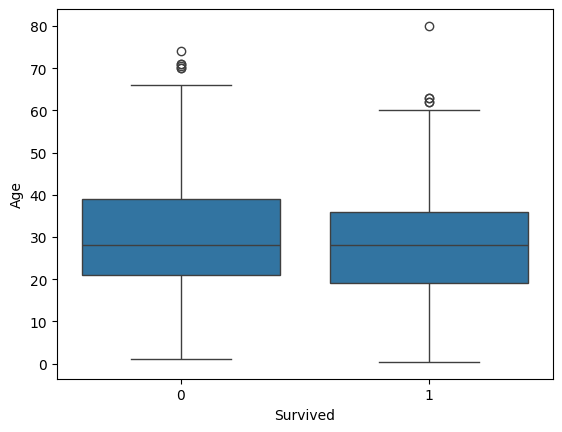

In [64]:
sns.boxplot(x='Survived',y ='Age', data= titanic_df)

## average age of survivors vs. non-survivors?

<Axes: xlabel='Survived'>

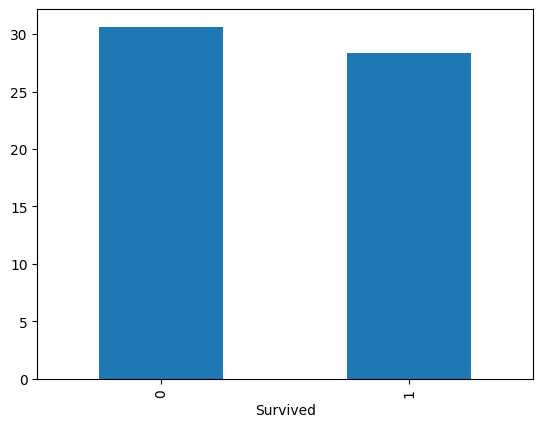

In [65]:
titanic_df.groupby('Survived')["Age"].mean().plot(kind='bar')

## passengers boarded from each Embarked location?

<Axes: xlabel='Embarked'>

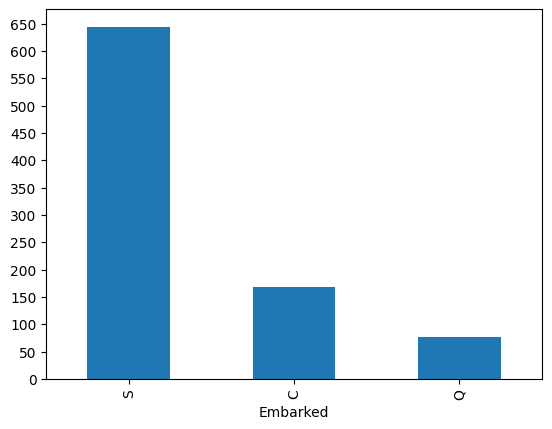

In [68]:
titanic_df['Embarked'].value_counts().plot(kind='bar',
                                          yticks=list(range(0,700,50)))

## survival rate by Embarked location

<Axes: xlabel='Embarked'>

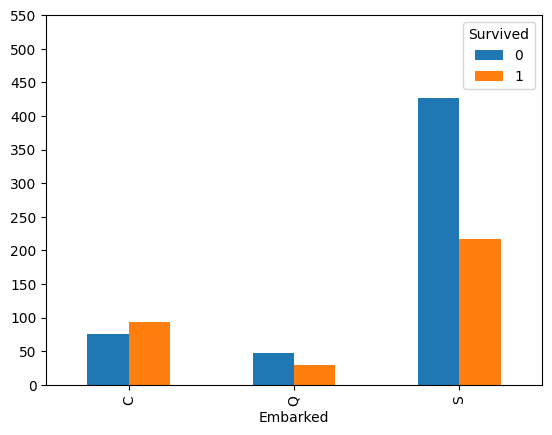

In [70]:
pd.crosstab(titanic_df['Embarked'], titanic_df.Survived).plot(kind='bar',
                                                    yticks=list(range(0,600,50)))

## average Fare by Pclass.

<Axes: xlabel='Pclass'>

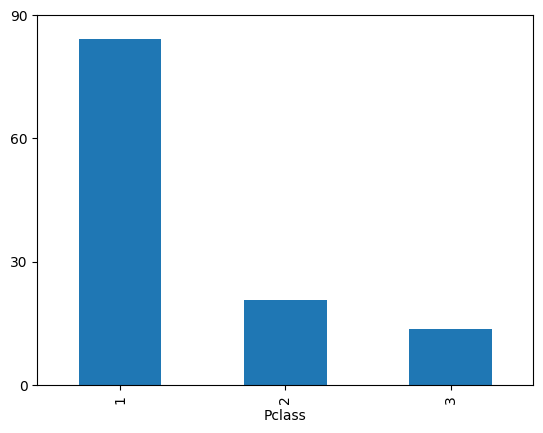

In [73]:
titanic_df.groupby('Pclass')['Fare'].mean().plot(kind='bar',
                                                yticks=list(range(0,100,30)))

## scatter plot of Fare vs. Age, colored by Survived.

<Axes: xlabel='Age', ylabel='Fare'>

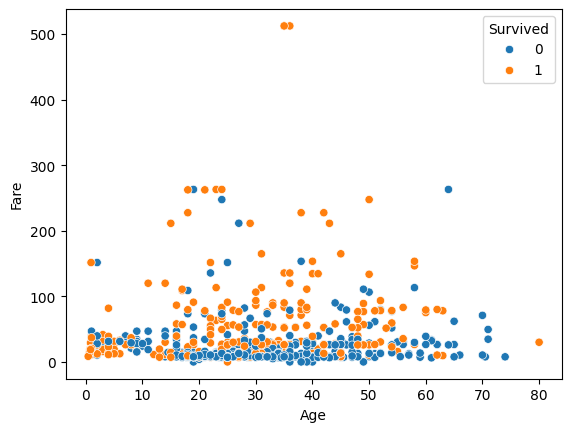

In [74]:
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived')

## survival rate for passengers who traveled alone vs. with family?

In [75]:
titanic_df['Alone']= (titanic_df['SibSp']+ titanic_df['Parch']==0)

In [78]:
survival_counts = titanic_df.groupby(['Alone', 'Survived']).size().unstack()
survival_rate = survival_counts.div(survival_counts.sum(axis=1), axis=0)



Survived         0         1
Alone                       
False     0.494350  0.505650
True      0.696462  0.303538


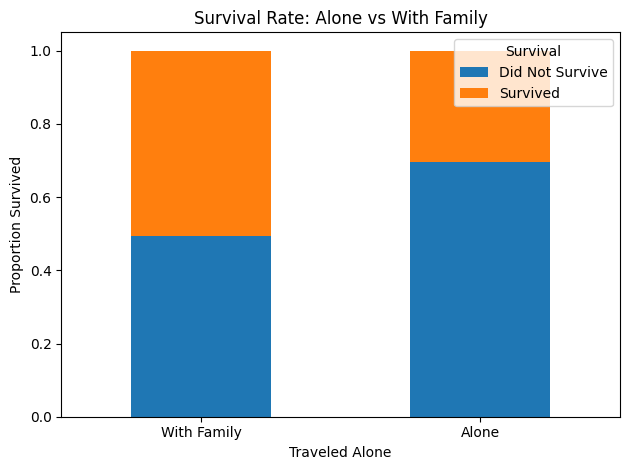

In [79]:
print(survival_rate)
survival_rate.plot(kind='bar', stacked=True, title='Survival Rate: Alone vs With Family')
plt.xlabel('Traveled Alone')
plt.ylabel('Proportion Survived')
plt.legend(['Did Not Survive', 'Survived'], title='Survival')
plt.xticks(ticks=[0,1], labels=['With Family', 'Alone'], rotation=0)
plt.tight_layout()
plt.show()

